# <center>Image Processing Final Project</center>

### Team Members

- **Fares Hazem Mohamed Shalaby**  
  ID: 20221443356

- **Peter Hany Fayez**  
  ID: 20221441026

## Importing Necessary Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os # interacting with the operating system, such as file and directory handling
import cv2 # OpenCV library for image processing
import matplotlib.pyplot as plt # library for data visualization

## Listing Files in a Kaggle Dataset Directory

In [2]:
# Traverse the input directory in the Kaggle environment and list all files with their paths.
for dirname, _, filenames in os.walk('/kaggle/input'): # Iterate through the directory structure
    for filename in filenames: # Loop through each file in the current directory
        print(os.path.join(dirname, filename)) # Print the full path of the file

/kaggle/input/lanelinedetection/TestData/Data/3007693.jpg
/kaggle/input/lanelinedetection/TestData/Data/1356503.jpg
/kaggle/input/lanelinedetection/TestData/Data/6003573.jpg
/kaggle/input/lanelinedetection/TestData/Data/3011063.jpg
/kaggle/input/lanelinedetection/TestData/Data/1354053.jpg
/kaggle/input/lanelinedetection/TestData/Data/4002963.jpg
/kaggle/input/lanelinedetection/TestData/Data/1363153.jpg
/kaggle/input/lanelinedetection/TestData/Data/6005823.jpg
/kaggle/input/lanelinedetection/TestData/Data/3003203.jpg
/kaggle/input/lanelinedetection/TestData/Data/3010193.jpg
/kaggle/input/lanelinedetection/TestData/Data/6010113.jpg
/kaggle/input/lanelinedetection/TestData/Data/6008863.jpg
/kaggle/input/lanelinedetection/TestData/Data/5029055.jpg
/kaggle/input/lanelinedetection/TestData/Data/5027435.jpg
/kaggle/input/lanelinedetection/TestData/Data/4011523.jpg
/kaggle/input/lanelinedetection/TestData/Data/2371358.jpg
/kaggle/input/lanelinedetection/TestData/Data/2366018.jpg
/kaggle/input/

## Acquiring Image

### Sample Image Loading and Visualization

Sample image path: /kaggle/input/lanelinedetection/TrainData/Data/1353363.jpg
Sample label path: /kaggle/input/lanelinedetection/TrainLabel/Label/1353363.jpg
Image exists: True
Label exists: True


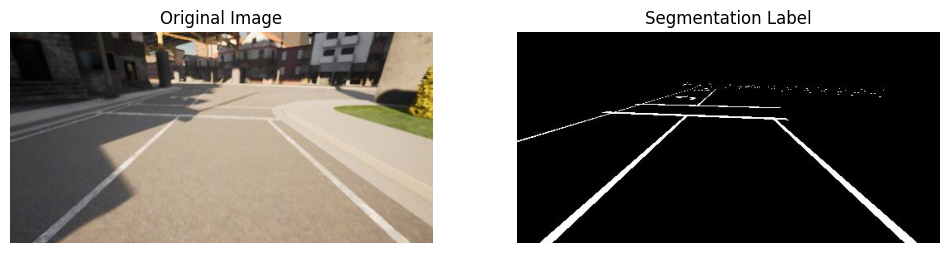

In [3]:
# Set the dataset path
data_path = '/kaggle/input/lanelinedetection'

# Define folders for training data and labels
train_data_path = os.path.join(data_path, 'TrainData', 'Data')
train_label_path = os.path.join(data_path, 'TrainLabel', 'Label')

# Load a sample image and its label
sample_image_path = os.path.join(train_data_path, '1353363.jpg')
sample_label_path = os.path.join(train_label_path, '1353363.jpg')

# Check if the paths are correct and the files exist
print("Sample image path:", sample_image_path)
print("Sample label path:", sample_label_path)
print("Image exists:", os.path.exists(sample_image_path))
print("Label exists:", os.path.exists(sample_label_path))

# Load the image and label
sample_image = cv2.imread(sample_image_path)
sample_label = cv2.imread(sample_label_path, cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded correctly
if sample_image is None:
    print("Failed to load the image.")
else:
    # Convert image from BGR to RGB for visualization
    sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)

    # Visualize the image and its label
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(sample_image)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(sample_label, cmap='gray')
    plt.title('Segmentation Label')
    plt.axis('off')

    plt.show()

## Image Pre-processing

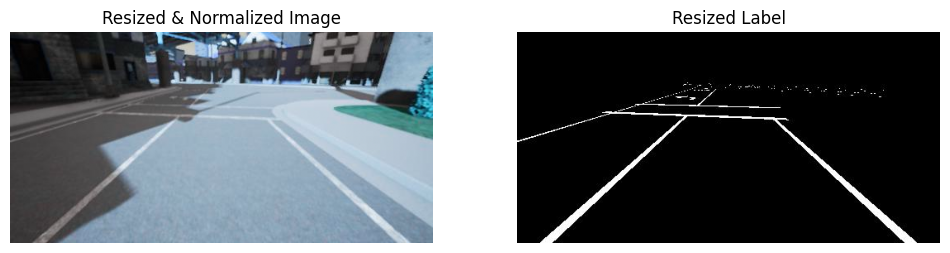

In [4]:
# Function to preprocess images and labels
def preprocess_image(image_path, label_path, img_size=(256, 256)):
    # Load the image and label
    image = cv2.imread(image_path)
    label = cv2.imread(label_path, cv2.IMREAD_GRAYSCALE)
    
    # Normalize the image (scale pixel values to [0, 1])
    image = image / 255.0
    
    return image, label

# Test preprocessing on a sample
sample_image_resized, sample_label_resized = preprocess_image(sample_image_path, sample_label_path)

# Visualize the preprocessed image and label
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(sample_image_resized)
plt.title('Resized & Normalized Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sample_label_resized, cmap='gray')
plt.title('Resized Label')
plt.axis('off')

plt.show()

## Noise Reduction


### Mean (Average) Filter

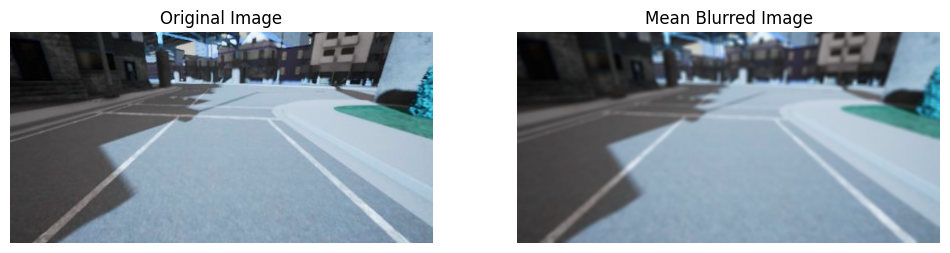

In [5]:
# Function to apply Mean Blur (Averaging Filter) for noise reduction
def apply_mean_blur(image, kernel_size=5):
    # Apply Mean Blur (Box Filter)
    blurred_image = cv2.blur((image * 255).astype('uint8'), (kernel_size, kernel_size))
    return blurred_image / 255.0  # Normalize back to [0, 1]

# Test mean blur on the sample image
sample_image_mean_blurred = apply_mean_blur(sample_image_resized)

# Visualize the original and mean blurred images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(sample_image_resized)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sample_image_mean_blurred)
plt.title('Mean Blurred Image')
plt.axis('off')

plt.show()

### Median Filter

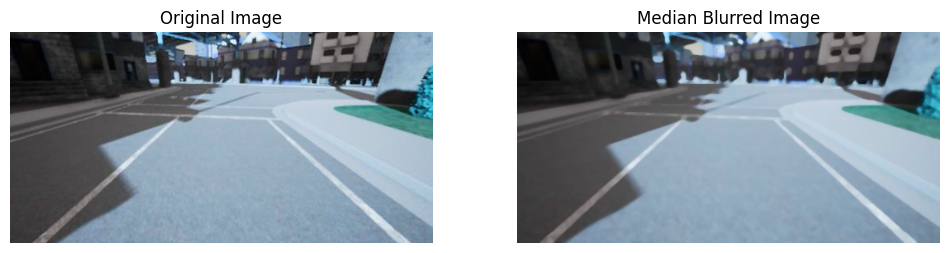

In [6]:
# Function to apply Median Blur for noise reduction
def apply_median_blur(image, kernel_size=5):
    # Apply Median Blur
    blurred_image = cv2.medianBlur((image * 255).astype('uint8'), kernel_size)
    return blurred_image / 255.0  # Normalize back to [0, 1]

# Test median blur on the sample image
sample_image_median_blurred = apply_median_blur(sample_image_resized)

# Visualize the original and median blurred images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(sample_image_resized)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sample_image_median_blurred)
plt.title('Median Blurred Image')
plt.axis('off')

plt.show()

### Maximum filter

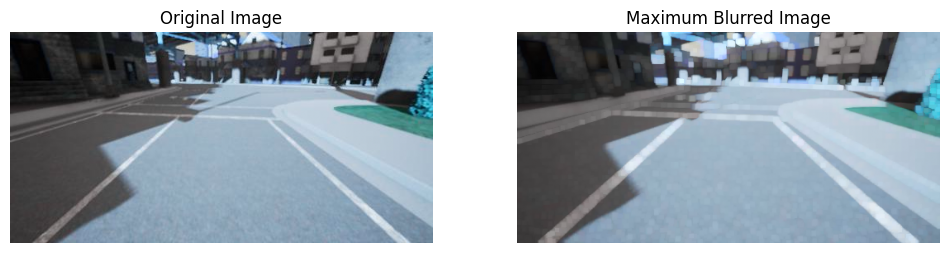

In [7]:
# Function to apply Maximum Filter for noise reduction
def apply_maximum_blur(image, kernel_size=5):
    # Apply Maximum Filter
    blurred_image = cv2.dilate((image * 255).astype('uint8'), np.ones((kernel_size, kernel_size), np.uint8))
    return blurred_image / 255.0  # Normalize back to [0, 1]

# Test maximum blur on the sample image
sample_image_maximum_blurred = apply_maximum_blur(sample_image_resized)

# Visualize the original and maximum blurred images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(sample_image_resized)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sample_image_maximum_blurred)
plt.title('Maximum Blurred Image')
plt.axis('off')

plt.show()

### Minimum Filter

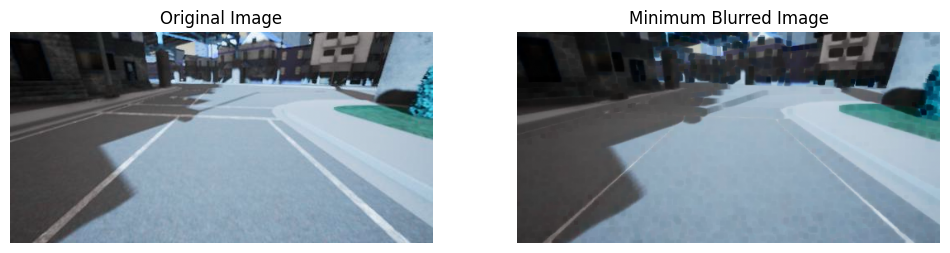

In [8]:
# Function to apply Minimum Filter for noise reduction
def apply_minimum_blur(image, kernel_size=5):
    # Apply Minimum Filter (Erosion operation)
    blurred_image = cv2.erode((image * 255).astype('uint8'), np.ones((kernel_size, kernel_size), np.uint8))
    return blurred_image / 255.0  # Normalize back to [0, 1]

# Test minimum blur on the sample image
sample_image_minimum_blurred = apply_minimum_blur(sample_image_resized)

# Visualize the original and minimum blurred images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(sample_image_resized)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sample_image_minimum_blurred)
plt.title('Minimum Blurred Image')
plt.axis('off')

plt.show()

### Gaussian Blur Filter

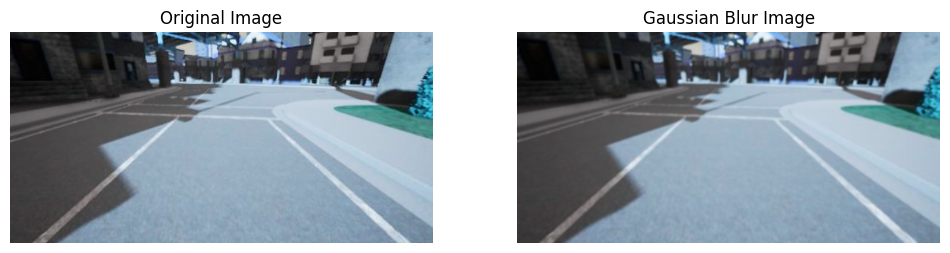

In [9]:
# Function to apply Gaussian Blur for noise reduction
def apply_noise_reduction(image):
    # Apply Gaussian Blur
    blurred_image = cv2.GaussianBlur(image, (3, 3), 0)  # (3, 3) is the kernel size
    return blurred_image

# Test noise reduction on the sample image
sample_image_blurred = apply_noise_reduction(sample_image_resized)

# Visualize the original and blurred images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(sample_image_resized)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sample_image_blurred)
plt.title('Gaussian Blur Image')
plt.axis('off')

plt.show()

## Contrast

### Linear Contrast Stretching 

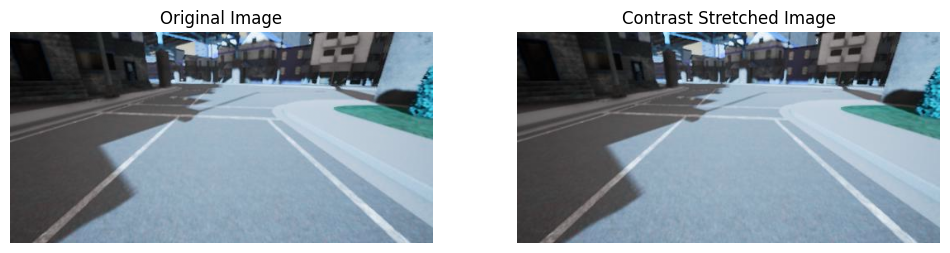

In [10]:
# Function to apply linear contrast stretching
def apply_linear_contrast_stretching(image):
    # Get the minimum and maximum pixel values in the image
    min_pixel = np.min(image)
    max_pixel = np.max(image)
    
    # Apply the linear contrast stretching formula
    stretched_image = (image - min_pixel) / (max_pixel - min_pixel) * 255.0
    return np.clip(stretched_image, 0, 255).astype('uint8')  # Ensure the result is within valid pixel range

# Test contrast stretching on the sample image
sample_image_contrast_stretched = apply_linear_contrast_stretching((sample_image_resized * 255).astype('float32'))

# Visualize the original and contrast-stretched images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(sample_image_resized)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sample_image_contrast_stretched)
plt.title('Contrast Stretched Image')
plt.axis('off')

plt.show()

### Histogram Equalization

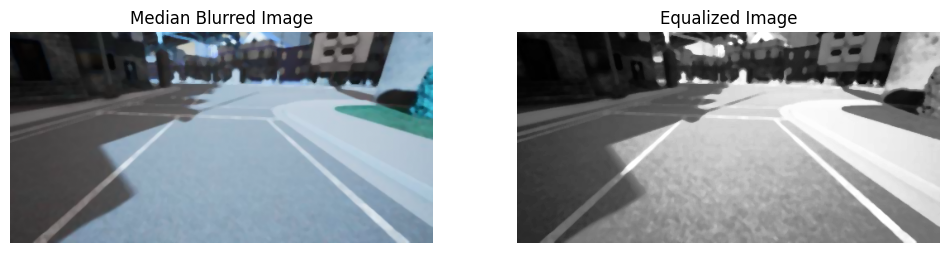

In [11]:
# Function to apply histogram equalization
def equalize_histogram(image):
    # Convert to grayscale
    gray_image = cv2.cvtColor((image * 255).astype('uint8'), cv2.COLOR_RGB2GRAY)
    # Apply histogram equalization
    equalized = cv2.equalizeHist(gray_image)
    return equalized

# Test histogram equalization
sample_image_equalized = equalize_histogram(sample_image_median_blurred)

# Visualize the original and equalized images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(sample_image_median_blurred)
plt.title('Median Blurred Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sample_image_equalized, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

plt.show()

## Image Segmentation

### - Histogram

#### 1) Simple Thresholding

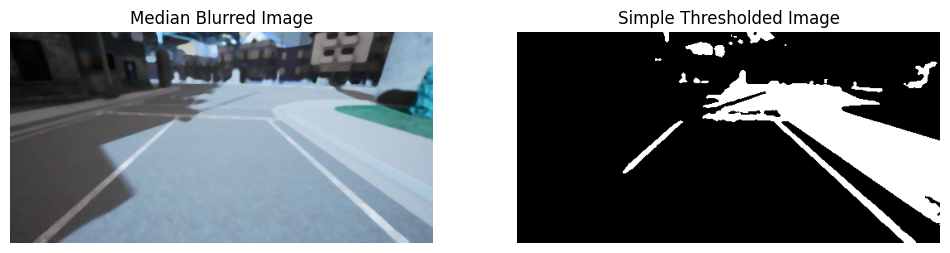

In [12]:
# Function to apply Simple Thresholding
def simple_threshold(image, threshold_value=180):
    # Convert to grayscale
    gray_image = cv2.cvtColor((image * 255).astype('uint8'), cv2.COLOR_RGB2GRAY)
    
    # Apply simple thresholding
    _, thresholded_image = cv2.threshold(gray_image, threshold_value, 255, cv2.THRESH_BINARY)
    return thresholded_image

# Test simple thresholding
sample_simple_thresholded = simple_threshold(sample_image_median_blurred)

# Visualize the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(sample_image_median_blurred)
plt.title('Median Blurred Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sample_simple_thresholded, cmap='gray')
plt.title('Simple Thresholded Image')
plt.axis('off')

plt.show()

#### 2) Global Thresholding

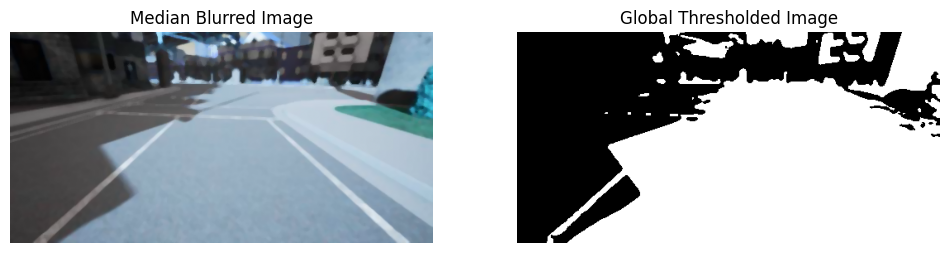

In [13]:
# Function to apply Global Thresholding
def global_threshold(image, threshold_value=200):
    # Convert to grayscale
    gray_image = cv2.cvtColor((image * 255).astype('uint8'), cv2.COLOR_RGB2GRAY)
    
    # Apply global thresholding
    _, thresholded_image = cv2.threshold(gray_image, threshold_value, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return thresholded_image

# Test global thresholding
sample_global_thresholded = global_threshold(sample_image_median_blurred)

# Visualize the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(sample_image_median_blurred)
plt.title('Median Blurred Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sample_global_thresholded, cmap='gray')
plt.title('Global Thresholded Image')
plt.axis('off')

plt.show()

### 3) Adaptive Thresholding

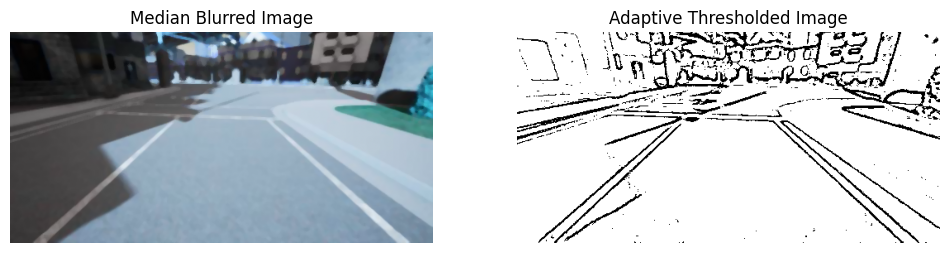

In [14]:
# Function to apply Adaptive Thresholding
def adaptive_threshold(image):
    # Convert to grayscale
    gray_image = cv2.cvtColor((image * 255).astype('uint8'), cv2.COLOR_RGB2GRAY)
    
    # Apply adaptive thresholding using Gaussian mean
    adaptive_thresh_image = cv2.adaptiveThreshold(
        gray_image, 255, 
        cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
        cv2.THRESH_BINARY, 
        blockSize=7,  # Size of the local region
        C=3 # Constant subtracted from the mean
    )
    return adaptive_thresh_image

# Test adaptive thresholding
sample_adaptive_thresholded = adaptive_threshold(sample_image_median_blurred)

# Visualize the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(sample_image_median_blurred)
plt.title('Median Blurred Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sample_adaptive_thresholded, cmap='gray')
plt.title('Adaptive Thresholded Image')
plt.axis('off')

plt.show()

### 4) Otsu Thresholding

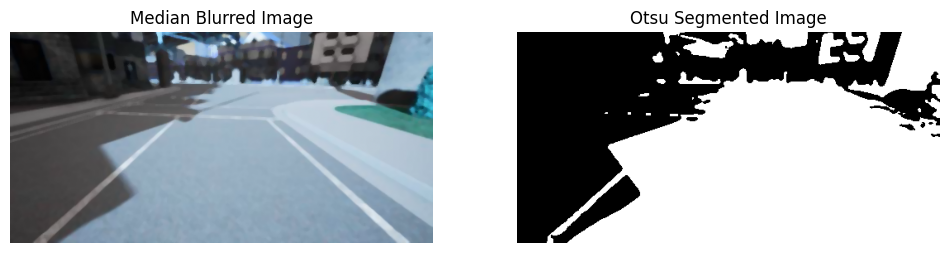

In [15]:
# Function to apply Otsu's thresholding
def otsu_threshold(image):
    # Convert to grayscale
    gray_image = cv2.cvtColor((image * 255).astype('uint8'), cv2.COLOR_RGB2GRAY)
    
    # Apply Otsu's thresholding
    _, otsu_segmented = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return otsu_segmented

# Test Otsu thresholding
sample_otsu_segmented = otsu_threshold(sample_image_median_blurred)

# Visualize the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(sample_image_median_blurred)
plt.title('Median Blurred Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sample_otsu_segmented, cmap='gray')
plt.title('Otsu Segmented Image')
plt.axis('off')

plt.show()

### - Region

#### 1) Clustering

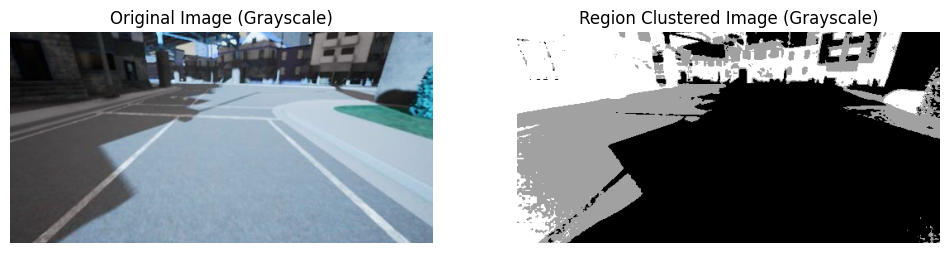

In [16]:
# Function to apply K-means clustering for region segmentation on grayscale image
def region_clustering_grayscale(image, k=2):
    # Convert to grayscale
    gray_image = cv2.cvtColor((image * 255).astype('uint8'), cv2.COLOR_RGB2GRAY)
    
    # Reshape the grayscale image to a 2D array (each pixel as a single intensity value)
    reshaped_image = gray_image.reshape((-1, 1))
    
    # Convert to float32 for k-means
    reshaped_image = np.float32(reshaped_image)
    
    # Criteria for the k-means algorithm (stopping criteria)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    
    # Apply K-means clustering
    _, labels, centers = cv2.kmeans(reshaped_image, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    
    # Convert the centers to 8-bit values (0-255)
    centers = np.uint8(centers)
    
    # Map the labels to the centers
    clustered_image = centers[labels.flatten()]
    
    # Reshape back to the original grayscale image shape
    clustered_image = clustered_image.reshape(gray_image.shape)
    
    return clustered_image

# Test region clustering on the sample image with grayscale conversion
sample_image_clustered_gray = region_clustering_grayscale((sample_image_resized * 255).astype('uint8'), k=3)

# Visualize the original and clustered grayscale images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(sample_image_resized, cmap='gray')
plt.title('Original Image (Grayscale)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sample_image_clustered_gray, cmap='gray')
plt.title('Region Clustered Image (Grayscale)')
plt.axis('off')

plt.show()

#### 2) Growth Region

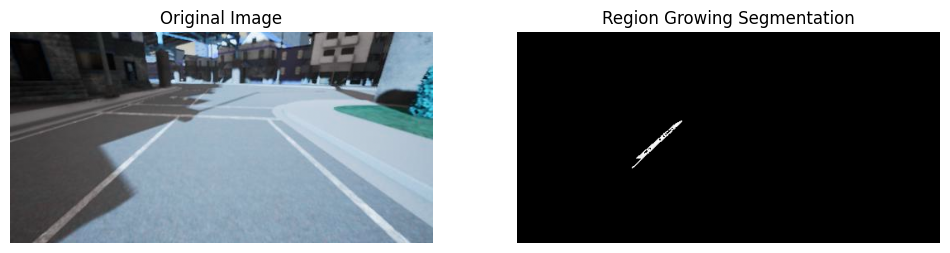

In [17]:
# Function to apply Region Growing for image segmentation
def region_growing(image, seed, threshold=30):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor((image * 255).astype('uint8'), cv2.COLOR_RGB2GRAY)
    
    # Get the dimensions of the image
    rows, cols = gray_image.shape
    
    # Create a mask to keep track of the pixels that are part of the region
    region_mask = np.zeros((rows, cols), dtype=np.uint8)
    
    # Stack to hold the pixels to check (initially only the seed pixel)
    stack = [seed]
    
    # Get the intensity of the seed pixel
    seed_intensity = gray_image[seed]
    
    # Prevent overflow by making sure intensity values are within 0-255 range
    if seed_intensity < 0: seed_intensity = 0
    if seed_intensity > 255: seed_intensity = 255
    
    while stack:
        # Pop a pixel from the stack
        x, y = stack.pop()
        
        # If the pixel is already part of the region, skip it
        if region_mask[x, y] == 1:
            continue
        
        # Check if the pixel intensity is within the threshold (prevent overflow)
        pixel_intensity = gray_image[x, y]
        
        # Convert to a larger integer type (int32) to avoid overflow during subtraction
        diff = np.abs(np.int32(pixel_intensity) - np.int32(seed_intensity))
        
        if diff < threshold:
            # Mark the pixel as part of the region
            region_mask[x, y] = 1
            
            # Add the neighboring pixels to the stack
            # Define 4-connected neighborhood (you can also use 8-connected neighborhood)
            for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
                nx, ny = x + dx, y + dy
                if 0 <= nx < rows and 0 <= ny < cols:
                    stack.append((nx, ny))
    
    # Create the segmented image based on the region mask
    segmented_image = np.zeros_like(gray_image)
    segmented_image[region_mask == 1] = gray_image[region_mask == 1]
    
    return segmented_image

# Test region growing on the sample image
seed_pixel = (150, 150)  # Set the seed pixel (choose coordinates based on the image)
segmented_image = region_growing(sample_image_resized, seed_pixel, threshold=19)

# Visualize the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(sample_image_resized, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image, cmap='gray')
plt.title('Region Growing Segmentation')
plt.axis('off')

plt.show()

#### 3) Split & Merge

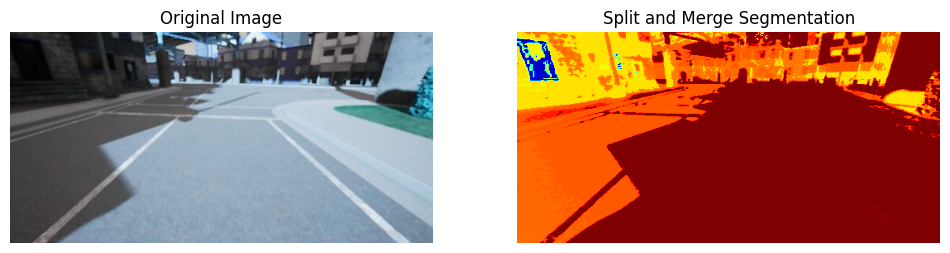

In [18]:
# Function to check homogeneity of a region
def is_homogeneous(region, threshold=100):
    """
    Check if the region is homogeneous based on its variance.
    """
    mean = np.mean(region)
    variance = np.var(region)
    
    return variance < threshold  # Threshold can be adjusted to control homogeneity

# Function to perform the Split and Merge algorithm
def split_and_merge(image, threshold=50):
    """
    Perform the split and merge algorithm on the image.
    """
    # Convert image to grayscale
    gray_image = cv2.cvtColor((image * 255).astype('uint8'), cv2.COLOR_RGB2GRAY)
    
    # Helper function to recursively split the image
    def split(region):
        h, w = region.shape
        
        # Base case: if the region is small enough or homogeneous, stop splitting
        if h == 1 or w == 1 or is_homogeneous(region, threshold):
            return [region]
        
        # Split the region into four quadrants
        mid_h, mid_w = h // 2, w // 2
        top_left = region[:mid_h, :mid_w]
        top_right = region[:mid_h, mid_w:]
        bottom_left = region[mid_h:, :mid_w]
        bottom_right = region[mid_h:, mid_w:]
        
        # Recursively split each quadrant
        return split(top_left) + split(top_right) + split(bottom_left) + split(bottom_right)
    
    # Start the splitting process from the entire image
    subregions = split(gray_image)
    
    # Merge similar regions
    merged_image = np.zeros_like(gray_image, dtype=np.uint16)  # Use uint16 to avoid overflow in labeling
    label = 0  # Label for the regions
    
    for subregion in subregions:
        mean_value = np.mean(subregion)
        mask = np.abs(gray_image - mean_value) < threshold
        
        # Assign labels (ensure the label fits in uint16, but still avoid overflow issues)
        merged_image[mask] = np.uint16(label)
        label += 1
    
    # Return the merged image (can be cast back to uint8 if needed for visualization)
    return merged_image

# Test Split and Merge on the sample image
segmented_image = split_and_merge(sample_image_resized, threshold=10)

# Visualize the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(sample_image_resized, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image, cmap='jet')  # Use 'jet' colormap to visualize segments
plt.title('Split and Merge Segmentation')
plt.axis('off')

plt.show()

### - Edge Detection

#### 1) Sobel Filter

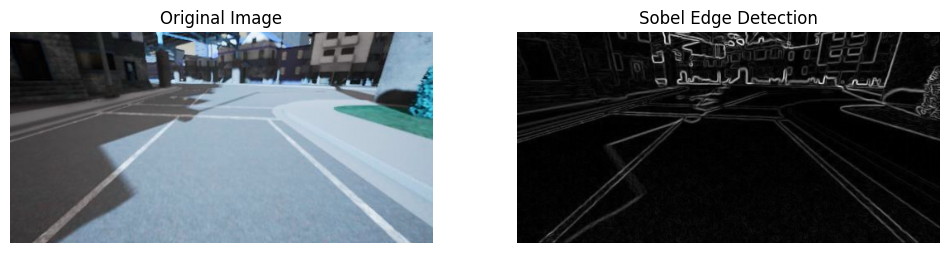

In [19]:
# Function to apply Sobel operator
def sobel_edge_detection(image):
    # Convert image to grayscale
    gray_image = cv2.cvtColor((image * 255).astype('uint8'), cv2.COLOR_RGB2GRAY)
    
    # Apply Sobel operator in both horizontal and vertical directions
    sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)  # Horizontal gradient
    sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)  # Vertical gradient
    
    # Compute the magnitude of the gradient
    magnitude = cv2.magnitude(sobel_x, sobel_y)
    
    # Normalize the magnitude to [0, 1]
    magnitude_normalized = cv2.normalize(magnitude, None, 0, 1, cv2.NORM_MINMAX)
    
    return magnitude_normalized

# Test Sobel edge detection on the sample image
sobel_edges = sobel_edge_detection(sample_image_resized)

# Visualize the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(sample_image_resized, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sobel_edges, cmap='gray')
plt.title('Sobel Edge Detection')
plt.axis('off')

plt.show()


#### 2) Prewitt Filter

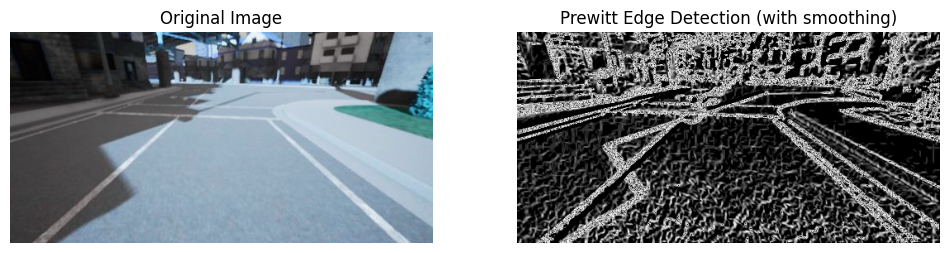

In [20]:
# Function to apply Prewitt operator with Gaussian smoothing and manual normalization
def prewitt_edge_detection(image, kernel_size=10, blur_sigma=1.0):
    # Convert image to grayscale
    gray_image = cv2.cvtColor((image * 255).astype('uint8'), cv2.COLOR_RGB2GRAY)
    
    # Check if the grayscale image is valid
    if gray_image is None or gray_image.size == 0:
        raise ValueError("Input image is not valid or empty.")
    
    # Apply Gaussian blur to reduce noise
    blurred_image = cv2.GaussianBlur(gray_image, (kernel_size, kernel_size), blur_sigma)
    
    # Define the Prewitt kernels
    kernel_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]], dtype=np.float32)  # Horizontal kernel
    kernel_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]], dtype=np.float32)  # Vertical kernel
    
    # Apply the Prewitt filter using convolution (filtering the image with kernels)
    prewitt_x = cv2.filter2D(blurred_image, -1, kernel_x)  # Horizontal gradient
    prewitt_y = cv2.filter2D(blurred_image, -1, kernel_y)  # Vertical gradient
    
    # Compute the magnitude of the gradient
    magnitude = np.sqrt(prewitt_x**2 + prewitt_y**2)
    
    # Check if the magnitude is valid (non-empty and non-zero)
    if magnitude is None or magnitude.size == 0:
        raise ValueError("Magnitude array is not valid or empty.")
    
    # Manually normalize the magnitude to the range [0, 1]
    min_magnitude = np.min(magnitude)
    max_magnitude = np.max(magnitude)
    
    if max_magnitude > min_magnitude:  # Avoid division by zero
        magnitude_normalized = (magnitude - min_magnitude) / (max_magnitude - min_magnitude)
    else:
        magnitude_normalized = np.zeros_like(magnitude)  # If there's no variation, set it to 0
    
    return magnitude_normalized

# Test Prewitt edge detection on the sample image with noise reduction
prewitt_edges = prewitt_edge_detection(sample_image_resized, kernel_size=5, blur_sigma=1.0)

# Visualize the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(sample_image_resized, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(prewitt_edges, cmap='gray')
plt.title('Prewitt Edge Detection (with smoothing)')
plt.axis('off')

plt.show()

## Canny and Morphological Operations

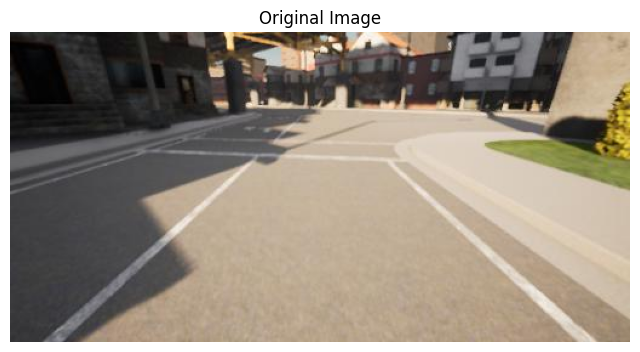

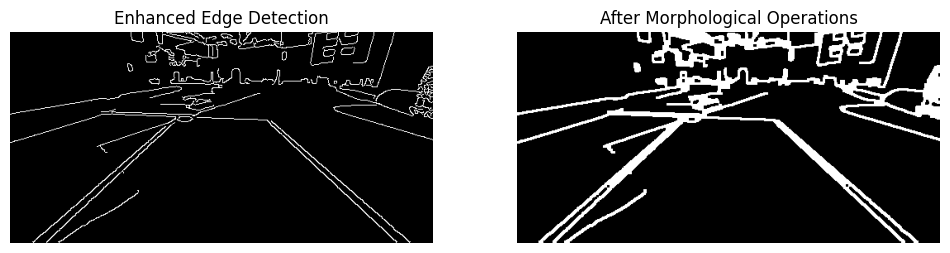

In [21]:
# Convert to grayscale
gray_image = cv2.cvtColor(sample_image, cv2.COLOR_RGB2GRAY)

# Apply Gaussian Blur to reduce noise
blurred_image = cv2.GaussianBlur(gray_image, (3, 3), 0)

# Enhanced Canny Edge Detection
edges = cv2.Canny(blurred_image, threshold1=50, threshold2=200)  # Lower threshold to capture more edges

# Morphological Operations
kernel = np.ones((3, 3), np.uint8)  # Adjust kernel size
dilated_edges = cv2.dilate(edges, kernel, iterations=2)  # Slight dilation
eroded_edges = cv2.erode(dilated_edges, kernel, iterations=1)  # Light erosion

# Visualize the original image
plt.figure(figsize=(8, 6))
plt.subplot(1, 1, 1)
plt.imshow(sample_image)
plt.title('Original Image')
plt.axis('off')

plt.show()

# Visualize the Results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(edges, cmap='gray')
plt.title('Enhanced Edge Detection')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(eroded_edges, cmap='gray')
plt.title('After Morphological Operations')
plt.axis('off')

plt.show()

## HSV Thresholding

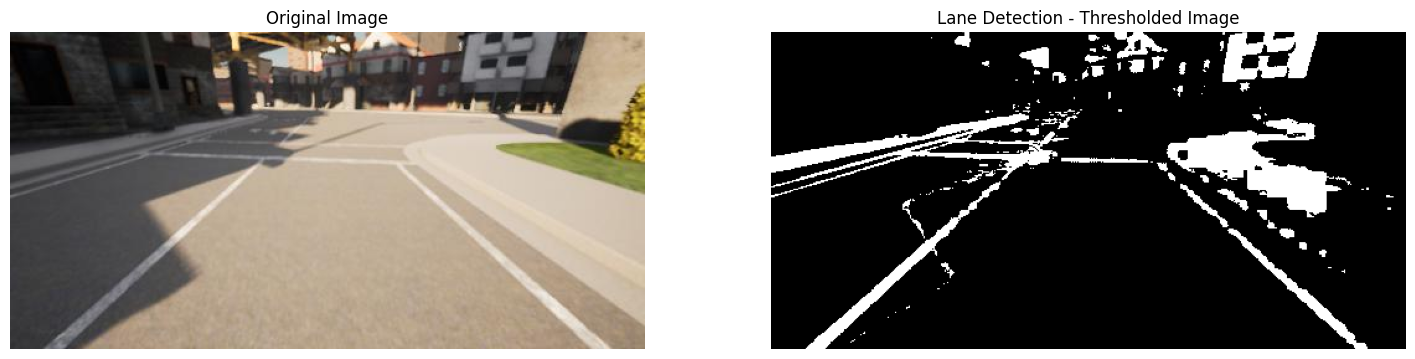

In [22]:
# Load the image
sample_image = cv2.imread(sample_image_path)

### Object Detection on Original Image
# Convert to HSV color space
hsv_frame = cv2.cvtColor(sample_image, cv2.COLOR_BGR2HSV)
    
# Define threshold values
lower = np.array([0, 0, 94])  # Lower bound for HSV
upper = np.array([255, 35, 255])  # Upper bound for HSV
    
# Apply HSV thresholding
mask = cv2.inRange(hsv_frame, lower, upper)

# Visualization
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(mask, cmap='gray')
plt.title("Lane Detection - Thresholded Image")
plt.axis('off')

plt.show()